In [7]:
import pandas as pd
import numpy as np
import itertools

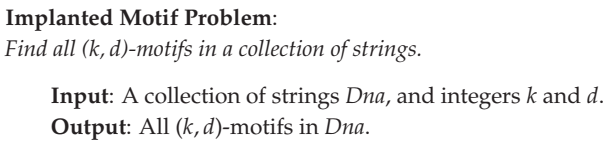
Definition of (k,d)-motif
<br> Given a collection of strings Dna and an integer d, a (k,d)-motif appears in every string from Dna with at most d mistmatches.
<br> Idea: Generate all such k-mers and then check which of them are (k,d)-motif.

In [80]:
def all_kmer(k):
    x = 'AGTC'
    l = itertools.product(x, repeat=k)
    l = list(l)
    result = []
    for i in l:
        temp = ''.join(i)
        result.append(temp)
    return result
def complement(dna):
    dna = dna.lower()
    result = []
    for i in dna:
        if i == 'a':
            result.append('t')
        elif i == 't':
            result.append('a')
        elif i == 'g':
            result.append('c')
        else:
            result.append('g')
    return "".join(result)
def Hamming_Distance(p,b,reverse=True):
    """input: p, b are of type string
    output: integer"""
    p = p.lower()
    c = 0
    if reverse == False:#because sometimes we don't need to compare the
        #with the reverse compliment region
        q = complement(b[::-1])
        
    else:
        q = b.lower()
    for i in range(len(p)):
        if p[i] != q[i]:
            c += 1
    return c
def NEIGHBORS(Pattern, d):
    neighbour = set()
    k = len(Pattern)
    all_of_kmers = all_kmer(k)
    for i in all_of_kmers:
        if Hamming_Distance(i,Pattern) == d:
            neighbour.add(i)
    #neighbour.add(Pattern)
    return neighbour
#Testing NEIGHBORS
#t10 = NEIGHBORS("CCAGTCAATG",2)


In [81]:
#All k-mers in a Dna:
def Dna_kmers(k,dna):
    l = []
    for i in range(len(dna)-k+1):
        l.append(dna[i:i+k])
    return l

def Hamming_Distance(p,b,reverse=True):
    """input: p, b are of type string
    output: integer"""
    p = p.lower()
    c = 0
    if reverse == False:#because sometimes we don't need to compare the
        #with the reverse compliment region
        q = complement(b[::-1])
        
    else:
        q = b.lower()
    for i in range(len(p)):
        if p[i] != q[i]:
            c += 1
    return c

#Test the Hamming distance
#a_ = "TGACCCGTTATGCTCGAGTTCGGTCAGAGCGTCATTGCGAGTAGTCGTTTGCTTTCTCAAACTCC"
#b_ = "GAGCGATTAAGCGTGACAGCCCCAGGGAACCCACAAAACGTGATCGCAGTCCATCCGATCATACA"
#t5 = Hamming_Distance(a_,b_)
#t5
#Dna_kmers(2,"ATTTGGC")

## Idea:
<br>1. Create a list of all k-mers of each string of dna in dna collections => saved in all_kmers
<br>2. Create all the neighbours of each k-mer above => saved in all_neighbour (except the original patterns)
<br>3. Indeed, each neighbour is a candidate, therefore, loop through all_neighbour, then compare all neighbour with each k-mer of all dna string in dnas => with each neighbour, I will save the min Hamming Distance of each dna string, if in that list, there is at least 1 element which is greater than the d => that is not the needed motif => move to the next one, but if there is noe element which is greater than the d => append it into the result.
<br>4. the result list will contain all the needed motifs => return result

In [84]:
def Motif_Enumeration(Dna,k,d):
    
    l = len(Dna[0])

    all_kmers = []
    
    #Generate all the k-mers
    dna_patterns = set()#a
    for i in Dna:
        temp = Dna_kmers(k=k,dna=i)
        all_kmers.append(temp)
        dna_patterns.update(set(temp))
        
    #for i in dna_patterns:
    all_neighbour = set()#A set of all motifs: a'
    for i in dna_patterns:
        neighbours = NEIGHBORS(i,d)
        all_neighbour.update(neighbours)
    result = []
    for i in all_neighbour:
        l1 = []
        for j in range(len(all_kmers)):
            list_Hamming = []
            for k in range(len(all_kmers[0])):
                hd = Hamming_Distance(all_kmers[j][k],i)
                list_Hamming.append(hd)
            temp = min(list_Hamming)
            l1.append(temp)
        if max(l1) <= d:
            result.append(i)
        else:
            continue
            
            
    return result
s = ["ATTTGGC", "TGCCTTA", "CGGTATC", "GAAAATT"]
Motif_Enumeration(s,3,1)


['TTT', 'ATT', 'ATA', 'GTT']

In [85]:
#Testing Motif_Enumeration
dnas = ["GAGTTAAGAGTCGTCAACTCTGTTG", "CGGTGGACGTATGATTCGCCGGTGG", "TTGTCTACGCTCGGCGCCTTTATTA", "TCGGCGCGGTAGTTCTTACAGACGG", "GCTCCTCGCCATCTCCCAGGATGCG", "TCGACCAGGGCGTCCATTACGCGTA"
]
Motif_Enumeration(dnas,5,1)

['CGTCG', 'TCGTC', 'GCCGT', 'TCGCC', 'TCGGC', 'TCGAC']